In [1]:
%matplotlib notebook
import math
import random as rd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def arraysFromDots(points):
    xarr = []
    yarr = []
    for point in points:
        x, y = point
        xarr.append(x)
        yarr.append(y)
    xarr.append(points[0][0])
    yarr.append(points[0][1])
    return (xarr, yarr)

In [2]:
class ACO:
    
    def __init__(self, points, itr = 100, popul = 20, a = 0.01, b = 1.1, p = 0.15):
        
        self.points = points       # Координаты точек
        self.pointsQ = len(points) # Количество точек
        self.itr = itr             # Количество итераций
        self.popul = popul         # Количесвто муравьев в популяции
        self.a = a                 # Альфа
        self.b = b                 # Бетта
        self.p = p                 # p (испарение ферамона)
            
        self.dists = spatial.distance.cdist(points, points, metric='euclidean') # Матрица длин дуг
        self.pher = np.ones((self.pointsQ, self.pointsQ))                       # Матрица ферамонов
        self.pherDelta = np.zeros((self.pointsQ, self.pointsQ))                 # Матрица изменений ферамонов на каждой итерации
        
        # Матрица вероятностей (длинны дуг)
        self.distProb = np.array(list(map(lambda x: list(map(lambda y: 1/y if y != 0 else 0, x)), self.dists)))
        
        self.bestPath = None # Лучший путь
        self.bestDist = 0    # Лучшая дистанция
        
        self.bestPaths = []  # Лучшие пути (текущие для каждой итерации)
        self.bestDists = []  # Лучшие дистанции (текущие для каждой итерации)
        
        
    def execute(self):
        
        for i in range(self.itr):
            
            bestPath = None
            bestDist = 0
            
            for ant in range(self.popul):
                
                path = [list(self.points[0]), ]                       # Путь
                currI = 0                                             # Текущая точка
                dist = 0                                              # Дистанция
                probTable = self.distProb**self.a * self.pher**self.b # Ненормализованная матрица вероятностей
                probTable[:, currI] = np.zeros(self.pointsQ)
                
                for j in range(self.pointsQ-1):
                    
                    # Нормализованные вероятности выбора следущей точки
                    prob = probTable[currI]
                    prob /= prob.sum()
                    
                    # Выбор следущей точки и добавление ее в путь
                    newI = np.random.choice(range(self.pointsQ), size=1, p=prob)[0]
                    path.append(list(self.points[newI]))
                    
                    # Увелечение феромонов на выбранном пути и подсчет дистанции
                    self.pherDelta[currI, newI] += 1/self.dists[currI, newI]
                    dist += self.dists[currI, newI]
                    
                    # Изменение текущей точки и удаление ее из возможного выбора
                    currI = newI
                    probTable[:, currI] = np.zeros(self.pointsQ)
                    
                # Поиск лучшего пути из популяции
                if dist < bestDist or bestDist == 0:
                    bestDist = dist
                    bestPath = path
            
            # Поиск лучшего пути на каждой итерации
            if bestDist < self.bestDist or self.bestDist == 0:
                self.bestDist = bestDist
                self.bestPath = bestPath
            
            # Изменение ферамонов
            self.pher = np.array(list(map(lambda x: (1-self.p)*x, self.pher))) + self.pherDelta
            
            # Текущий лучший путь и дистанция
            self.bestPaths.append(self.bestPath)
            self.bestDists.append(self.bestDist)

In [3]:
orig_points = np.random.rand(20, 2)

In [10]:
start_points = orig_points.copy()

itr = 200
popul = 40
a = 0.01
b = 1.1
p = 0.15

aco = ACO(start_points, itr, popul, a, b, p)
aco.execute()

paths = aco.bestPaths
dists = aco.bestDists
bestP = aco.bestPath
bestD = aco.bestDist

In [11]:
print(f'Начальный путь: \n{paths[0]}\n')
print(f'Начальная дистанция: {dists[0]}\n\n')

for i in range(0, len(paths), 10):
    print(f'Итерация: {i} Расстояние: {round(dists[i], 3)}')
      
print(f'\n\nКонечный путь: \n{paths[-1]}\n')
print(f'Конечная дистанция: {dists[-1]}')

Начальный путь: 
[[0.3036433684548919, 0.6088190336912546], [0.01677138384242416, 0.9314167565828266], [0.1440281546156128, 0.8877936229112652], [0.6637552150475845, 0.5432998638622679], [0.5170251841435809, 0.8573845729006341], [0.9488845321219489, 0.7927337961793615], [0.9767632277982975, 0.5729061320472114], [0.6253157785263461, 0.5966087497794288], [0.5071389718330781, 0.5050106207342349], [0.6381683779375064, 0.9038044217210552], [0.771171307294242, 0.7326619883019088], [0.3439318438244361, 0.4179895618295276], [0.5328243275172277, 0.5180262666203838], [0.4384195112269721, 0.16164577717246753], [0.1498138366847518, 0.16319248877946946], [0.6814995723631179, 0.9963705732248723], [0.6317995845334309, 0.3896501149607742], [0.866786659433761, 0.3952164761774345], [0.5351399491478758, 0.19016160102032742], [0.5293837928263426, 0.02826662971724314]]

Начальная дистанция: 7.118703396094326


Итерация: 0 Расстояние: 7.119
Итерация: 10 Расстояние: 4.537
Итерация: 20 Расстояние: 4.308
Итера

<IPython.core.display.Javascript object>


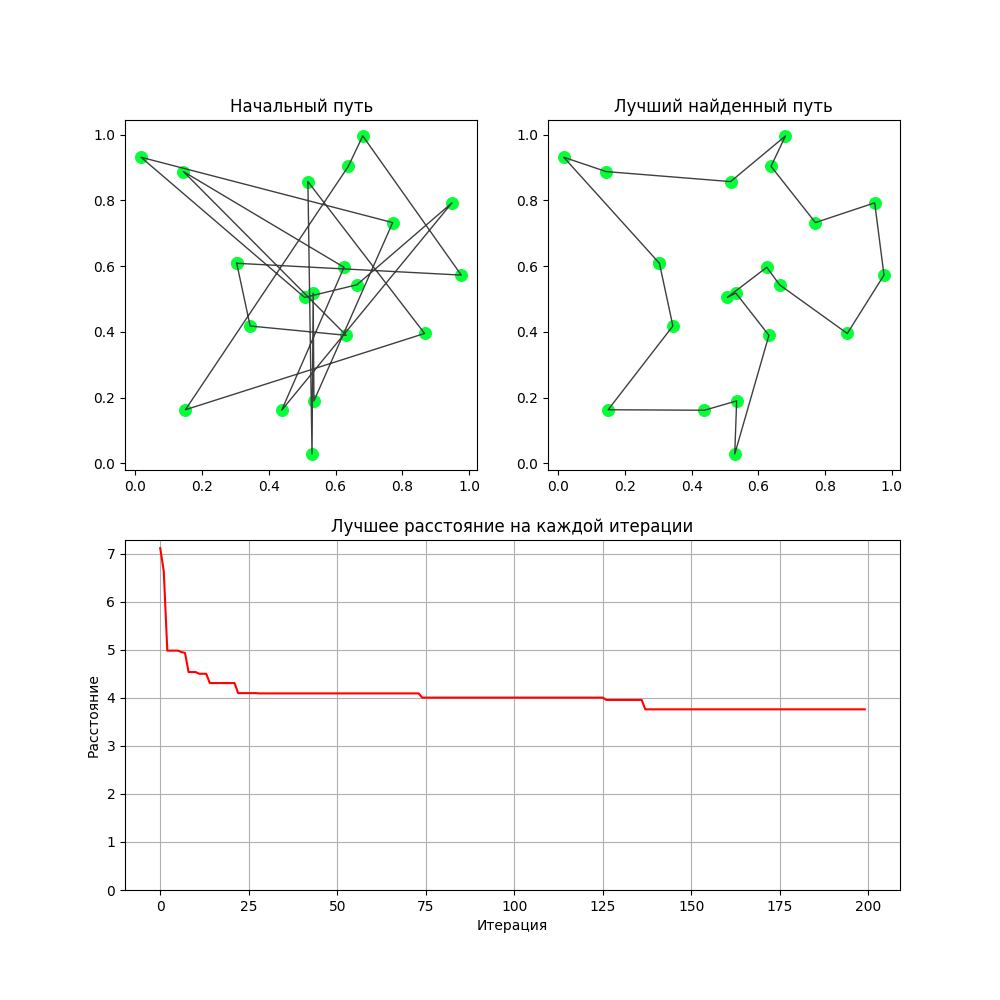

In [12]:
xCoords, yCoords = arraysFromDots(start_points)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3, 4))
ax1.set_title('Начальный путь')
ax2.set_title('Лучший найденный путь')
ax1.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax2.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax1.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

xCoords, yCoords = arraysFromDots(bestP)

ax2.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

ax3.set_title('Лучшее расстояние на каждой итерации')
ax3.plot(dists, color='red', linewidth=1.5)
ax3.set_xlabel('Итерация')
ax3.set_ylabel('Расстояние')
ax3.set_ylim(0)
ax3.grid()

<IPython.core.display.Javascript object>


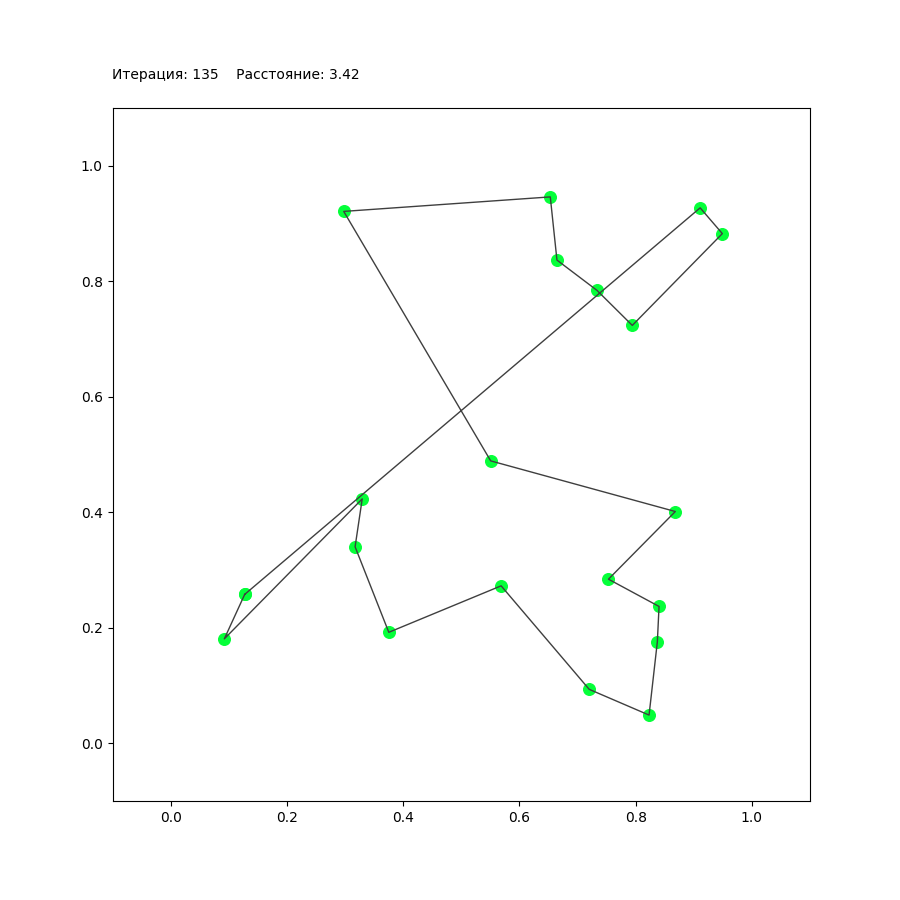

In [133]:
figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

axA.scatter(xCoords, yCoords, c='#05FF39', s=70)
line, = axA.plot([], color='#3f3f3f', linewidth=1)
temp = axA.text(-0.1, 1.15, '')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

def animate(i):
    x, y = arraysFromDots(paths[i])
    temp.set_text(f'Итерация: {i}    Расстояние: {round(float(dists[i]), 2)}')
    line.set_data((x, y))
    
anim = FuncAnimation(figA, animate, frames=len(paths), interval=200, repeat=False)

In [69]:
%matplotlib notebook
import math
import random as rd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def arraysFromDots(points):
    xarr = []
    yarr = []
    for point in points:
        x, y = point
        xarr.append(x)
        yarr.append(y)
    xarr.append(points[0][0])
    yarr.append(points[0][1])
    return (xarr, yarr)

class ACO:
    
    def __init__(self, points, itr = 100, popul = 20, a = 0.01, b = 1.1, p = 0.15):
        
        self.points = points       # Координаты точек
        self.pointsQ = len(points) # Количество точек
        self.itr = itr             # Количество итераций
        self.popul = popul         # Количесвто муравьев в популяции
        self.a = a                 # Альфа
        self.b = b                 # Бетта
        self.p = p                 # p (испарение ферамона)
            
        self.dists = spatial.distance.cdist(points, points, metric='euclidean') # Матрица длин дуг
        self.pher = np.ones((self.pointsQ, self.pointsQ))                       # Матрица ферамонов
        self.pherDelta = np.zeros((self.pointsQ, self.pointsQ))                 # Матрица изменений ферамонов на каждой итерации
        
        # Матрица вероятностей (длинны дуг)
        self.distProb = np.array(list(map(lambda x: list(map(lambda y: 1/y if y != 0 else 0, x)), self.dists)))
        
        self.bestPath = None # Лучший путь
        self.bestDist = 0    # Лучшая дистанция
        
        self.bestPaths = []  # Лучшие пути (текущие для каждой итерации)
        self.bestDists = []  # Лучшие дистанции (текущие для каждой итерации)
        
        
    def execute(self):
        
        for i in range(self.itr):
            
            bestPath = None
            bestDist = 0
            
            for ant in range(self.popul):
                
                path = [list(self.points[0]), ]                       # Путь
                currI = 0                                             # Текущая точка
                dist = 0                                              # Дистанция
                probTable = self.distProb**self.a * self.pher**self.b # Ненормализованная матрица вероятностей
                probTable[:, currI] = np.zeros(self.pointsQ)
                
                for j in range(self.pointsQ-1):
                    
                    # Нормализованные вероятности выбора следущей точки
                    prob = probTable[currI]
                    prob /= prob.sum()
                    
                    # Выбор следущей точки и добавление ее в путь
                    newI = np.random.choice(range(self.pointsQ), size=1, p=prob)[0]
                    path.append(list(self.points[newI]))
                    
                    # Увелечение феромонов на выбранном пути и подсчет дистанции
                    self.pherDelta[currI, newI] += 1/self.dists[currI, newI]
                    dist += self.dists[currI, newI]
                    
                    # Изменение текущей точки и удаление ее из возможного выбора
                    currI = newI
                    probTable[:, currI] = np.zeros(self.pointsQ)
                    
                # Поиск лучшего пути из популяции
                if dist < bestDist or bestDist == 0:
                    bestDist = dist
                    bestPath = path
            
            # Поиск лучшего пути на каждой итерации
            if bestDist < self.bestDist or self.bestDist == 0:
                self.bestDist = bestDist
                self.bestPath = bestPath
            
            # Изменение ферамонов
            self.pher = np.array(list(map(lambda x: (1-self.p)*x, self.pher))) + self.pherDelta
            
            # Текущий лучший путь и дистанция
            self.bestPaths.append(self.bestPath)
            self.bestDists.append(self.bestDist)
            

# Инициализация начального пути и параметров
orig_points = np.random.rand(20, 2)
start_points = orig_points.copy()
itr = 200
popul = 40
a = 0.01
b = 1.1
p = 0.15

# Запуск алгоритма
aco = ACO(start_points, itr, popul, a, b, p)
aco.execute()

# Выходные данные
paths = aco.bestPaths
dists = aco.bestDists
bestP = aco.bestPath
bestD = aco.bestDist


# Вывод результатов
print(f'Начальный путь: \n{paths[0]}\n')
print(f'Начальная дистанция: {dists[0]}\n\n')

for i in range(0, len(paths), 10):
    print(f'Итерация: {i} Расстояние: {round(dists[i], 3)}')
      
print(f'\n\nКонечный путь: \n{paths[-1]}\n')
print(f'Конечная дистанция: {dists[-1]}')


# Графики
xCoords, yCoords = arraysFromDots(start_points)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3, 4))
ax1.set_title('Начальный путь')
ax2.set_title('Лучший найденный путь')
ax1.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax2.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax1.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

xCoords, yCoords = arraysFromDots(bestP)

ax2.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

ax3.set_title('Лучшее расстояние на каждой итерации')
ax3.plot(dists, color='red', linewidth=1.5)
ax3.set_xlabel('Итерация')
ax3.set_ylabel('Расстояние')
ax3.set_ylim(0)
ax3.grid()


# Анимация
figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

axA.scatter(xCoords, yCoords, c='#05FF39', s=70)
line, = axA.plot([], color='#3f3f3f', linewidth=1)
temp = axA.text(-0.1, 1.15, '')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

def animate(i):
    x, y = arraysFromDots(paths[i])
    temp.set_text(f'Итерация: {i}    Расстояние: {round(float(dists[i]), 2)}')
    line.set_data((x, y))
    
anim = FuncAnimation(figA, animate, frames=len(paths), interval=200, repeat=False)